In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [283]:
import random
import math

class KMeans():
    
    def __init__(self, n_clusters):
        
        self.n_clusters = n_clusters
        
    def fit(self, X):
        
        #Sorteando os pontos iniciais dos centróides
        self.cluster_centers = np.zeros([self.n_clusters, 2])
        
        for i in range(0, self.n_clusters):
            x = random.uniform(8, 12)
            y = random.uniform(8, 12)
            self.cluster_centers[i] = [x, y]
        
        #Associando cada ponto ao centróide mais próximo
        self.y_kmeans = np.zeros(len(X))
        
        for j in range(0, len(X)):
            point = X[j]
            better_dist = np.linalg.norm(point - self.cluster_centers[0])
            
            for i in range(1, self.n_clusters):
                dist = np.linalg.norm(point - self.cluster_centers[i])
                if(dist < better_dist):
                    better_dist = dist
                    self.y_kmeans[j] = i
        
        
    def predict(self, X):
        
        count = 0;
        while(count < 100):
            
            count += 1
            
            #Tirando a média de todos os pontos
            medias = np.zeros([self.n_clusters, 2])
            quantidade = np.zeros(self.n_clusters)

            for j in range(0, len(X)):
                indice = math.floor(self.y_kmeans[j])
                medias[indice] += X[j]
                quantidade[indice] += 1

            #Definindo novos centróides
            for i in range(0, len(medias)):
                self.cluster_centers[i] = medias[i] / quantidade[i]

            #Reagrupando os pontos de acordo com os novos centróides
            for j in range(0, len(X)):
                point = X[j]
                better_dist = np.linalg.norm(point - self.cluster_centers[0])

                for i in range(1, self.n_clusters):
                    dist = np.linalg.norm(point - self.cluster_centers[i])
                    if(dist < better_dist):
                        better_dist = dist
                        self.y_kmeans[j] = i
        
                    
        
        return self.y_kmeans          
        
    
    def cost(self, X):
        
        cost = 0

        for j in range(0, len(X)):
            point = X[j]
            indice = math.floor(self.y_kmeans[j])
            cost += np.linalg.norm(point - self.cluster_centers[indice])
        
        return cost / len(X)
        
        

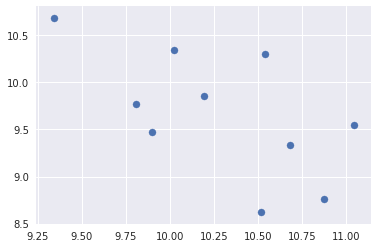

In [405]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=100, centers=4,
                       cluster_std=0.60, random_state=1, center_box=(10, 10))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis');


In [406]:
plt.gcf().clear()

In [410]:
max_t = 10 #Quantidade de vezes rodando o algoritmo para cada Cluster
max_k = 10 #Quantidade de Clusters (Inicia no 2 e vai até o max_k (inclusivo))
melhora_aceitavel = 0.01 #Maior que isso aceitamos a melhora, menor que esse valor, paramos o algoritmo.

better_y = np.zeros(len(X))
better_centers
better_cost = 999
better_k = 2

k_based_better_y_seted = False
k_based_better_y = np.zeros(len(X))
k_based_better_k = 0

media_costs = np.zeros(max_k - 1)

k = 2
while(k <= max_k):
    
    print("Clusters", k)
    t = 0
    media_costs[k - 2] = 999
    
    while(t < max_t):
        
        #Rodando o algoritmo
        kmeans = KMeans(k)
        kmeans.fit(X)
        y_kmeans = kmeans.predict(X)
        centers = kmeans.cluster_centers
        
        #Custo
        cost = kmeans.cost(X)
        
        #Definindo o melhor custo geral
        if(cost < better_cost):
            better_cost = cost
            better_y = y_kmeans
            better_centers = centers
            better_k = k
            
        #Definindo o melhor custo daquele cluster
        if(cost < media_costs[k - 2]):
            media_costs[k - 2] = cost
        
        t += 1
    
    #Conferindo se já passou da melhora aceitável
    if(k - 3 >= 0 and k_based_better_y_seted == False):
        if(media_costs[k - 3] - media_costs[k - 2] < melhora_aceitavel):
            k_based_better_y_seted = True
            k_based_better_centers = better_centers
            k_based_better_y = better_y
            k_based_better_cost = media_costs[k - 2]
            k_based_better_k = k
    
    k += 1
    

print("")
print("Melhor custo:", better_cost)
print("Melhor K:", better_k)
print("Melhores custos de cada K:")
print(media_costs)

#Printando os melhores resultados
plt.scatter(X[:, 0], X[:, 1], c=better_y, s=50, cmap='viridis')
plt.scatter(better_centers[:, 0], better_centers[:, 1], c='black', s=200, alpha=0.5);
        


Clusters 2


/home/felcks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


Clusters 3
Clusters 4
Clusters 5
Clusters 6
Clusters 7
Clusters 8
Clusters 9
Clusters 10


KeyboardInterrupt: 

In [ ]:
plt.gcf().clear()

In [ ]:
if(k_based_better_k != 0):
    print("")
    print("Melhor custo para o K baseado na melhoria", k_based_better_cost)
    print("Melhor K baseado na melhoria", k_based_better_k)

    #Printando os melhores resultados baseados no melhor K
    plt.scatter(X[:, 0], X[:, 1], c=k_based_better_y, s=50, cmap='viridis')
    plt.scatter(k_based_better_centers[:, 0], k_based_better_centers[:, 1], c='black', s=200, alpha=0.5);
else:
    print("Não temos K baseado na melhoria diferente da resposta do algoritmo.")
    print("Para o número K de clusters dados e a melhoria proposta, o algoritimo está convergindo aceitavelmente")

In [403]:
plt.gcf().clear()

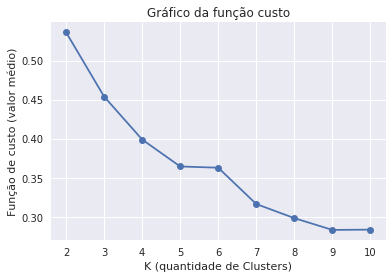

In [404]:
x_index = np.zeros(max_k-1)
for i in range(0, max_k-1):
    x_index[i] = i + 2

plt.plot(x_index, media_costs, marker="o")
plt.title("Gráfico da função custo")
plt.xlabel("K (quantidade de Clusters)")
plt.ylabel("Função de custo (valor médio)")
plt.show()